[View in Colaboratory](https://colab.research.google.com/github/zaidalyafeai/Notebooks/blob/master/Custom_Data_Generator_in_Keras.ipynb)

In [1]:
!wget http://files.fast.ai/data/dogscats.zip

--2018-08-30 15:13:33--  http://files.fast.ai/data/dogscats.zip
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857214334 (818M) [application/zip]
Saving to: ‘dogscats.zip’

dogscats.zip        100%[===================>] 817.50M   102MB/s    in 8.3s    

2018-08-30 15:13:41 (98.9 MB/s) - ‘dogscats.zip’ saved [857214334/857214334]



In [0]:
!unzip dogscats.zip >> tmp 

In [7]:
!ls dogscats/train/dogs | wc -l 

11500


In [8]:
import os 
base = "dogscats/train/"
classes = os.listdir(base)
print(classes)

['dogs', 'cats']


In [0]:
labels = {}
i = 0 

for c in classes:
  c_images = os.listdir(base+c)
  
  for image in c_images:
    labels[c+'/'+image] = i
  i+=1 

In [11]:
print(labels)

{'dogs/dog.201.jpg': 0, 'dogs/dog.7783.jpg': 0, 'dogs/dog.2012.jpg': 0, 'dogs/dog.8860.jpg': 0, 'dogs/dog.3960.jpg': 0, 'dogs/dog.12455.jpg': 0, 'dogs/dog.2146.jpg': 0, 'dogs/dog.11016.jpg': 0, 'dogs/dog.8937.jpg': 0, 'dogs/dog.10959.jpg': 0, 'dogs/dog.2908.jpg': 0, 'dogs/dog.6533.jpg': 0, 'dogs/dog.10285.jpg': 0, 'dogs/dog.3057.jpg': 0, 'dogs/dog.9110.jpg': 0, 'dogs/dog.8228.jpg': 0, 'dogs/dog.9122.jpg': 0, 'dogs/dog.10646.jpg': 0, 'dogs/dog.7643.jpg': 0, 'dogs/dog.939.jpg': 0, 'dogs/dog.4146.jpg': 0, 'dogs/dog.2782.jpg': 0, 'dogs/dog.334.jpg': 0, 'dogs/dog.2889.jpg': 0, 'dogs/dog.7690.jpg': 0, 'dogs/dog.10631.jpg': 0, 'dogs/dog.1940.jpg': 0, 'dogs/dog.6283.jpg': 0, 'dogs/dog.9240.jpg': 0, 'dogs/dog.6804.jpg': 0, 'dogs/dog.2841.jpg': 0, 'dogs/dog.9277.jpg': 0, 'dogs/dog.121.jpg': 0, 'dogs/dog.11181.jpg': 0, 'dogs/dog.12321.jpg': 0, 'dogs/dog.5140.jpg': 0, 'dogs/dog.12370.jpg': 0, 'dogs/dog.8083.jpg': 0, 'dogs/dog.11240.jpg': 0, 'dogs/dog.4988.jpg': 0, 'dogs/dog.6048.jpg': 0, 'dogs/dog

In [0]:
import cv2 

def preprocess_image(img):
  w,h = 224, 224 
  
  img = cv2.resize(img, (w,h))
  img = img/255. 
  
  return img 

In [0]:
def image_generator(input_ids, batch_size = 32):
  
  while True:
    batch_paths = np.random.choice(a= input_ids, size = batch_size)
    
    batch_input = []
    batch_output = []
    
    for input_id in batch_paths:
      input = cv2.imread(base+input_id)
      output = labels[input_id]
      
      input = preprocess_image(input)
      
      batch_input += [input]
      batch_output += [output]
   
    batch_x = np.array(batch_input)
    batch_y = np.array(batch_output)
    
    yield (batch_x, batch_y)

In [0]:
import numpy as np 
from random import shuffle 

batch_size = 32 

img_ids = list(labels.keys())
shuffle(img_ids)

split = int(0.8 * len(img_ids))

train_ids = img_ids[0:split]
valid_ids = img_ids[split:]

train_generator = image_generator(train_ids, batch_size = batch_size)
valid_generator = image_generator(valid_ids, batch_size = batch_size)

In [23]:
x, y = next(train_generator)

print(x.shape)
print(y.shape)

(32, 224, 224, 3)
(32,)


cats


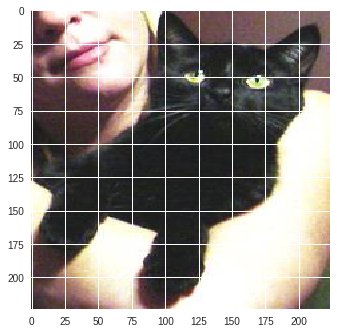

In [25]:
import matplotlib.pyplot as plt
print(classes[y[0]])
plt.imshow(x[0][:,:,::-1])
plt.show()

In [0]:
import keras 

from keras.layers import Convolution2D, MaxPooling2D, Dense, Flatten

model = keras.Sequential()

model.add(Convolution2D(16, (3,3), padding="same", input_shape =[224, 224, 3], activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32, (3,3), padding="same", activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(64, (3,3), padding="same", activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation ='relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [30]:
train_steps = len(train_ids) // batch_size 
valid_steps = len(valid_ids) // batch_size 

model.fit_generator(train_generator, validation_data= valid_generator, 
                    epochs = 3, steps_per_epoch = train_steps, validation_steps = valid_steps)

Epoch 1/3
575/575 [==============================] - 109s 190ms/step - loss: 0.7703 - acc: 0.6699 - val_loss: 0.5399 - val_acc: 0.7277
Epoch 2/3
575/575 [==============================] - 101s 176ms/step - loss: 0.4669 - acc: 0.7781 - val_loss: 0.4837 - val_acc: 0.7786
Epoch 3/3
575/575 [==============================] - 106s 184ms/step - loss: 0.3820 - acc: 0.8304 - val_loss: 0.4513 - val_acc: 0.8099
